In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, shapiro, skew, boxcox, boxcox_normmax
from scipy.special import boxcox1p, inv_boxcox


%matplotlib inline

#Set float number just have two decimals
pd.set_option('display.float_format','{:.2f}' .format)

sns.set()
from IPython.display import Image
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
#import dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
pd.options.display.max_columns=999
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,1329.00,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.00,Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.00,Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.00,TA,TA,PConc,TA,TA,No,GLQ,602.00,Unf,0.00,324.00,926.00,GasA,Ex,Y,SBrkr,926,678,0,1604,0.00,0.00,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.00,Fin,2.00,470.00,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.00,Gd,TA,PConc,Gd,TA,No,ALQ,263.00,Unf,0.00,1017.00,1280.00,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.00,RFn,2.00,506.00,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#Dropping column 'Id' since it will be not useful for predicting house price 
# But I will save it first to a variable to  be used later for submission

train_id = df_train['Id']
test_id = df_test['Id']

#Drop column 'Id'
df_train.drop(['Id'],axis=1, inplace=True)
df_test.drop(['Id'],axis=1, inplace=True)

In [6]:
#Train dataset info after dropping 'Id'
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
#Test dataset info after dropping 'Id'
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

## EDA

### Descriptive Statistics

In [8]:
df_train.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.00,1460,1201.00,1460.00,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.00,1460.00,1460.00,1460.00,1460,1460,1460,1460,1452,1452.00,1460,1460,1460,1423,1423,1422,1423,1460.00,1422,1460.00,1460.00,1460.00,1460,1460,1460,1459,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460,1460.00,1460,1460.00,770,1379,1379.00,1379,1460.00,1460.00,1379,1379,1460,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,7,281,54,1460.00,1460.00,1460.00,1460,1460,1460.00
unique,nan,5,nan,nan,2,2,4,4,2,5,3,25,9,8,5,8,nan,nan,nan,nan,6,8,15,16,4,nan,4,5,6,4,4,4,6,nan,6,nan,nan,nan,6,5,2,5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4,nan,7,nan,5,6,nan,3,nan,nan,5,5,3,nan,nan,nan,nan,nan,nan,3,4,4,nan,nan,nan,9,6,nan
top,nan,RL,nan,nan,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,nan,nan,nan,nan,Gable,CompShg,VinylSd,VinylSd,None,nan,TA,TA,PConc,TA,TA,No,Unf,nan,Unf,nan,nan,nan,GasA,Ex,Y,SBrkr,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,TA,nan,Typ,nan,Gd,Attchd,nan,Unf,nan,nan,TA,TA,Y,nan,nan,nan,nan,nan,nan,Gd,MnPrv,Shed,nan,nan,nan,WD,Normal,nan
freq,nan,1151,nan,nan,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,nan,nan,nan,nan,1141,1434,515,504,864,nan,906,1282,647,649,1311,953,430,nan,1256,nan,nan,nan,1428,741,1365,1334,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,735,nan,1360,nan,380,870,nan,605,nan,nan,1311,1326,1340,nan,nan,nan,nan,nan,nan,3,157,49,nan,nan,nan,1267,1198,nan
mean,56.90,NaN,70.05,10516.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.10,5.58,1971.27,1984.87,NaN,NaN,NaN,NaN,NaN,103.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.64,NaN,46.55,567.24,1057.43,NaN,NaN,NaN,NaN,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,NaN,6.52,NaN,0.61,NaN,NaN,1978.51,NaN,1.77,472.98,NaN,NaN,NaN,94.24,46.66,21.95,3.41,15.06,2.76,NaN,NaN,NaN,43.49,6.32,2007.82,NaN,NaN,180921.20
std,42.30,NaN,24.28,9981.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.38,1.11,30.20,20.65,NaN,NaN,NaN,NaN,NaN,181.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.10,NaN,161.32,441.87,438.71,NaN,NaN,NaN,NaN,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,NaN,1.63,NaN,0.64,NaN,NaN,24.69,NaN,0.75,213.80,NaN,NaN,NaN,125.34,66.26,61.12,29.32,55.76,40.18,NaN,NaN,NaN,496.12,2.70,1.33,NaN,NaN,79442.50
min,20.00,NaN,21.00,1300.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1872.00,1950.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,NaN,NaN,NaN,NaN,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,2.00,NaN,0.00,NaN,NaN,1900.00,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,1.00,2006.00,NaN,NaN,34900.00
25%,20.00,NaN,59.00,7553.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.00,1954.00,1967.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,223.00,795.75,NaN,NaN,NaN,NaN,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,NaN,5.00,NaN,0.00,NaN,NaN,1961.00,NaN,1.00,334.50,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,5.00,2007.00,NaN,NaN,129975.00
50%,50.00,NaN,69.00,9478.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,5.00,1973.00,1994.00,NaN,Na

### Categorical and Numerical Features Relationship with Target Variable

In [9]:
#Classify the variables into numerical and categorical
all_columns = df_train.columns.values
types = np.array([dt for dt in df_train.dtypes])
is_num = types != 'object'
num_cols = all_columns[is_num]
cat_cols = all_columns[~is_num]

In [10]:
#Numerical Variables
num_cols

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [11]:
#Categorical Variables
cat_cols

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

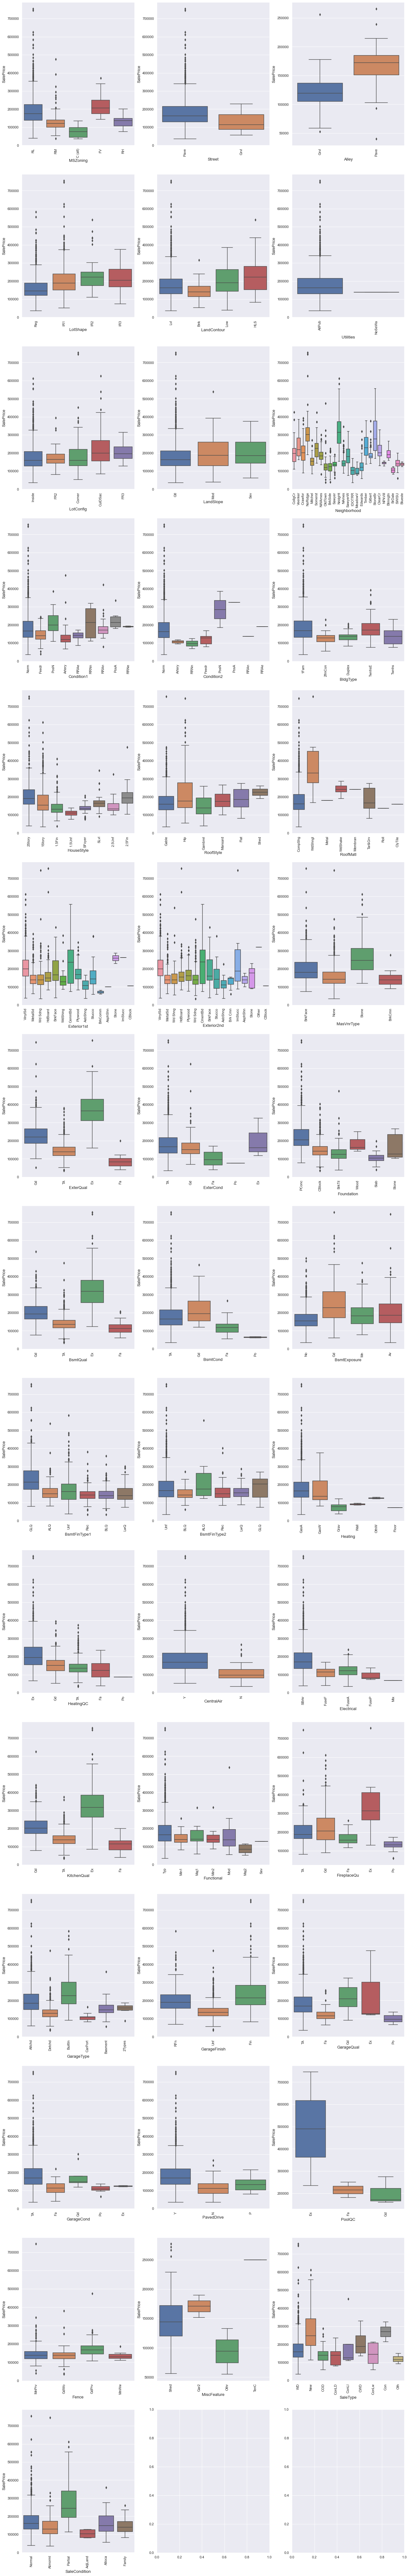

In [12]:
#Boxplot of categorical features
fig, ax  = plt.subplots(ncols=3, nrows=15, figsize=(15,60))
plt.subplots_adjust(right=1.25)
plt.subplots_adjust(top=2)
for i, col in enumerate(cat_cols, start=1):
    plt.subplot(15,3,i)
    boxplt=sns.boxplot(df_train[col], df_train['SalePrice'])
    plt.xlabel(col, fontsize=13)
    plt.ylabel('SalePrice', fontsize=13)
    plt.xticks(rotation=90)
plt.show()  

In [13]:
['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
 'CentralAir', 'KitchenQual', 'FirePlaceQu', 'GarageFinish', 'GarageQual','GarageCond', 'PoolQC', 'Fence']

['LotShape',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FirePlaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence']

Boxplot of 'Utilities' feature shows that almost all of the houses has 'AllPub' access and only one house that has 'NoSewa' category so this feature will be a bad predictor for SalePrice and can be dropped or eliminated safely.

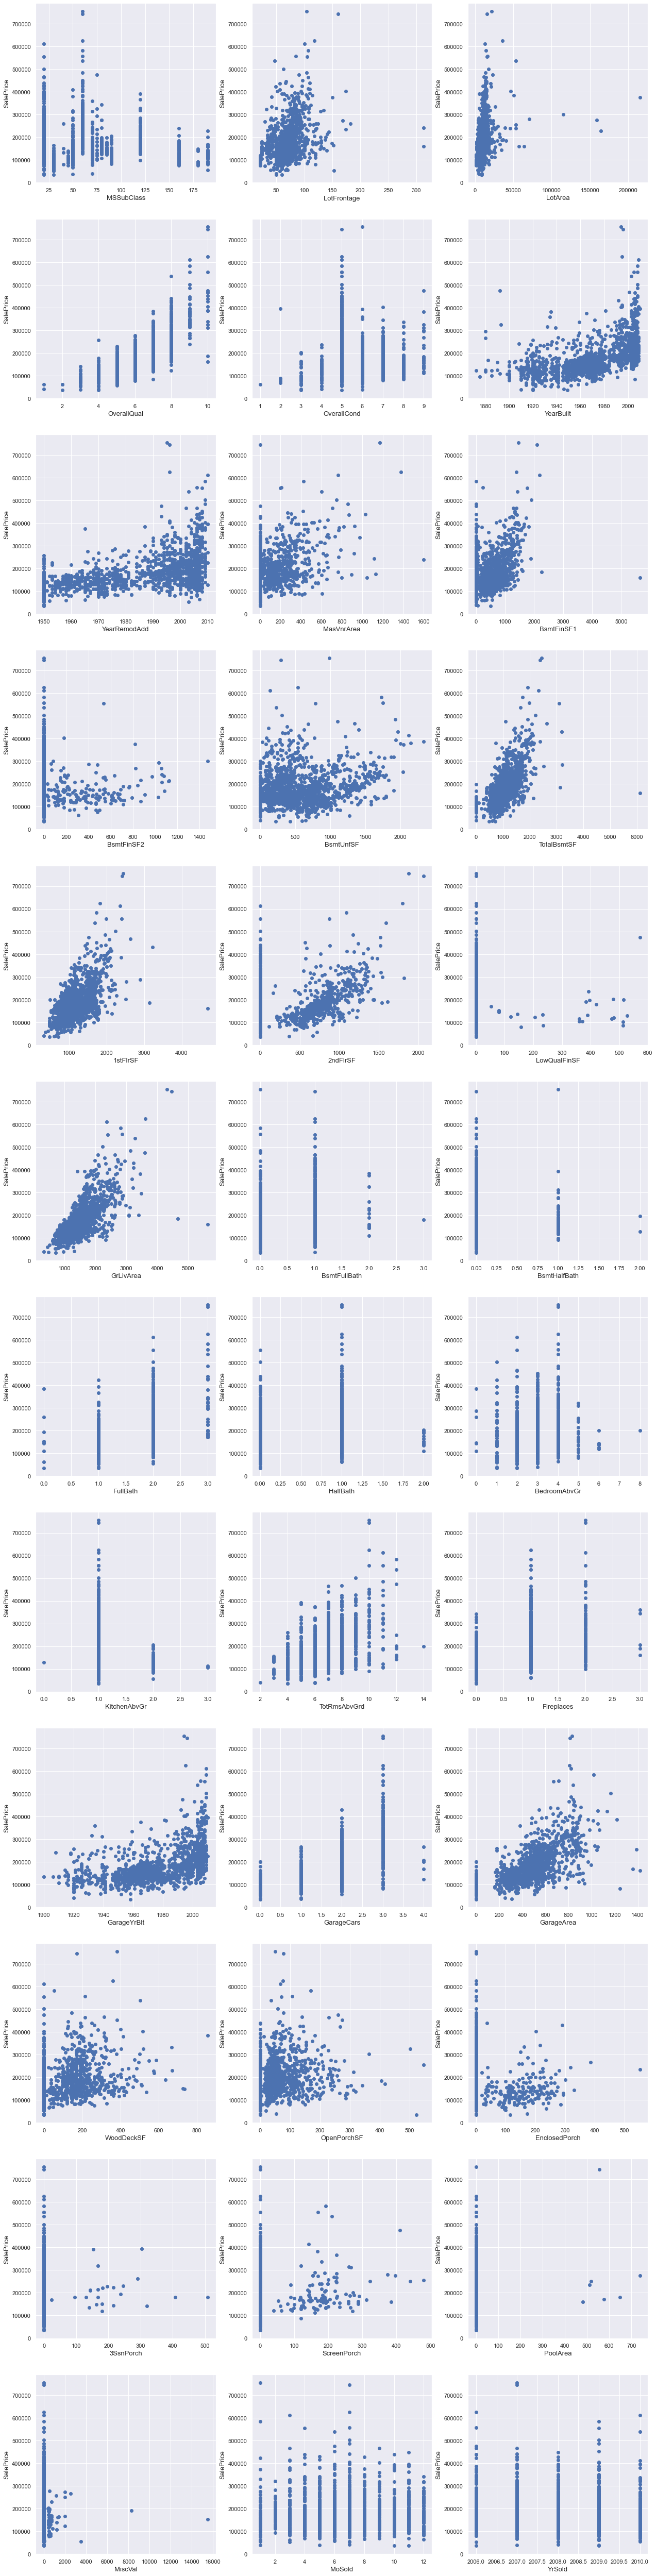

In [14]:
#Scatterplot of numerical features

#Deleting SalePrice as target from numerical features
num_cols = np.delete(num_cols, -1)
fig, ax = plt.subplots(ncols=3, nrows=12, figsize=(12,50))
plt.subplots_adjust(right=1.5)
plt.subplots_adjust(top=1.5)
for i, col in enumerate(num_cols,start=1):
    plt.subplot(12,3,i)
    plt.scatter(df_train[col], df_train['SalePrice'])
    plt.xlabel(col, fontsize=13)
    plt.ylabel('SalePrice', fontsize=13)
plt.show()

From the scatterplots above, there are 3 features that actually are categorical variables so we need to convert them to 'object' data type. Those features are 'MSSubClass','MoSold','YrSold'. 'OverallQual' and 'OverallCond' are not included to the list because their categories are ordinal (have order) so we don't need to transform them later for label encoding.

### Correlation Matrix

Other that scatter plot, way to find out relationship between independent and dependent variables is by making correlation matrix. Two variables may have strong or weak correlation and positive or negative correlation. 

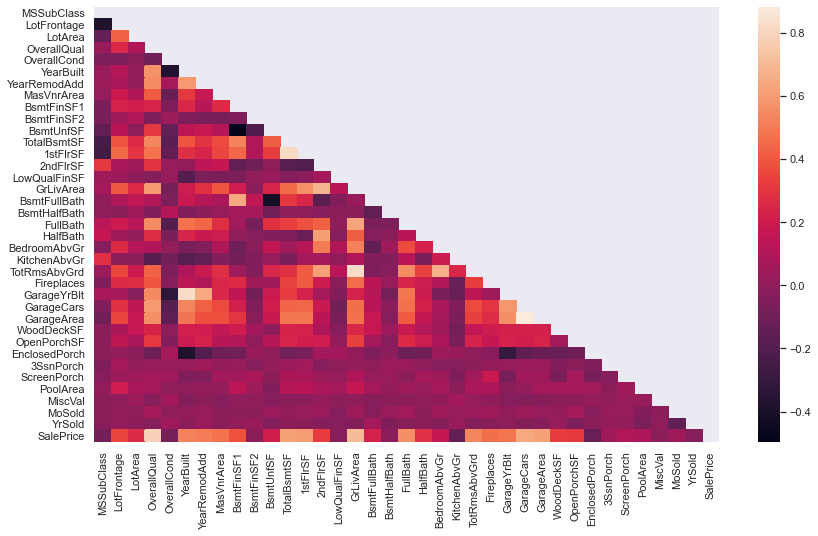

In [15]:
#Correlation visualization with heatmap
corr = df_train.corr()
plt.figure(figsize=(14,8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask)
plt.show()

From visualization above, it's a bit difficult to differentiate which pairs of variable that have strong correlation. It's impractical to draw conclusion from this heatmap due to large number of variables.
I will unstack the correlation matrix to find out which pairs of variable that have strong correlation. These are the labels of correlation strength from a [reference](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression):
<br>
0 - 0.19: very weak
<br>
0.2 - 0.39 : weak
<br>
0.40 - 0.59: moderate
<br>
0.6 - 0.79 : strong
<br>
0.8 - 1 : very strong

In [16]:
#Unstack the correlation matrix and filter correlation value >= 0.6
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.sort_values()
strong_pairs = sorted_pairs[abs(sorted_pairs) >= 0.6]
pd.set_option("max_rows", None)
strong_pairs =pd.DataFrame(strong_pairs).reset_index()
strong_pairs.columns=['var1','var2','corr']

#Dropping correlation of variable with the variable itself
indexName = strong_pairs.loc[strong_pairs['var1']==strong_pairs['var2']].index
strong_pairs.drop(indexName,inplace=True)

#Dropping one of the identical pairs correlation
idx = 1
row_list=[]
while idx<len(strong_pairs):
    if (strong_pairs.loc[idx,'var1']==strong_pairs.loc[(idx-1),'var2']) and (strong_pairs.loc[idx,'var2']==strong_pairs.loc[(idx-1),'var1']) :
        row_list.append(idx)
    idx+=1
strong_pairs.drop(row_list,inplace=True)

#Sorted by the variables
strong_pairs.reset_index(inplace=True)
strong_pairs.drop('index',axis=1, inplace=True)
strong_pairs.sort_values(by=['var1','var2'])

,var1,var2,corr
1,1stFlrSF,SalePrice,0.61
14,1stFlrSF,TotalBsmtSF,0.82
4,2ndFlrSF,TotRmsAbvGrd,0.62
9,BsmtFinSF1,BsmtFullBath,0.65
17,GarageArea,GarageCars,0.88
5,GarageArea,SalePrice,0.62
0,GarageCars,OverallQual,0.60
16,GarageYrBlt,YearBuilt,0.83
11,GrLivArea,2ndFlrSF,0.69
6,GrLivArea,FullBath,0.63


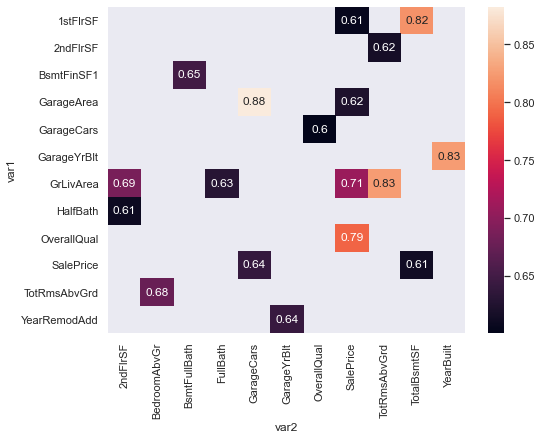

In [17]:
#Visualization of strong pairs with heatmap 
pivot = strong_pairs.pivot(index='var1', columns= 'var2', values='corr')
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True)
plt.show()

According to visualization above, there are several independent variables that have strong correlation with target variable 'SalePrice' or with other independent variables:
1. Target variable 'SalePrice' have the strongest correlation with 'OverallQual' and 'GrLivArea' followed by 'GarageCars, '1stFlrSF' and 'GarageArea'
2. 'GarageArea' and 'GarageCars' are very strongly correlated and may have contain the same information to predict 'SalePrice'
3. 'GrLivArea' and 'TotRmsAbvGrd' also are very strongly correlated. Bigger floor area house more likely has more rooms.
4. 'YearBuilt' and 'GarageYrBlt' have very strong correlation since  house garage probably was built the same time or same year the house was built
5. '1stFlrSF' and 'TotalBsmtSF' also are very strongly correlated

Generally, strongly correlated predictors may cause severe multicollinearity and we have to handle them properly. If I want to interpret the significance of a predictor (A) properly, I have to remove that another predictor (B) which (A) strongly correlated with. But in this case, we are focusing on machine learning model with sole focus on accuracy so we don't care so much about a predictor's significance interpretability. And also I will use more complex algorithm such as Ridge and Lasso Regression that can handle multicollinearity with their regularization methods.

## Preprocessing

### Outliers

From the [journal (page 4)](http://jse.amstat.org/v19n3/decock.pdf) about Ames Housing Dataset, the author would recommend to removing any houses  with more than 4000 square feet from the train data set. A scatter plot of SalePrice versus GrLivArea will quickly indicate these outliers.

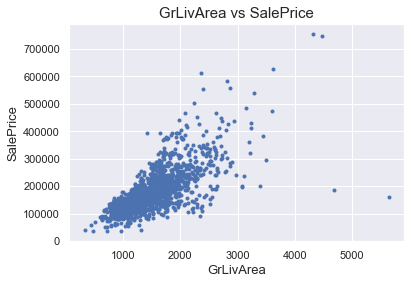

In [18]:
plt.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'], marker='.')
plt.title('GrLivArea vs SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.show()

Scatter plot of GrLivArea vs SalePrice shows that there are 2 outliers of houses with large GrLivArea but has low SalePrice. Because these outliers are extreme outlier and the author said to remove houses with more than 4000 square feet so we can safely remove those 2 outliers. 

In [19]:
outliers = df_train['GrLivArea'].sort_values(ascending=True)[-2:].index
df_train.drop(outliers, inplace=True)

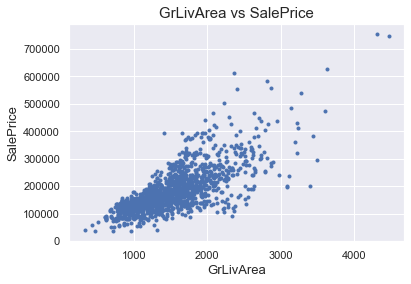

In [20]:
plt.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'], marker='.')
plt.title('GrLivArea vs SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.show()

### Target Variable

We must check the normality of target variable 'SalePrice' to see if the variable distribution is skewed in certain degree or has normal distribution. Why do we care if the data skewed? Because if the SalePrice is skewed then the model will be trained on much larger number of moderately priced houses and the houses with most expensive prices will be not predicted less accurate. 

To test the normality of SalePrice, I use these 3 methods:
1. Histogram/distribution plot: to see if distribution is bell curved shape or not
2. Normal probability plot/QQPlot: to see whether the distribution follow the diagonal straight line that represent the normal distribution 
3. Shapiro-Wilk test: The null hypothesis for this test is that the data is a sample from a normal distribution, so a p-value less than 0.05 indicates significant skewness.

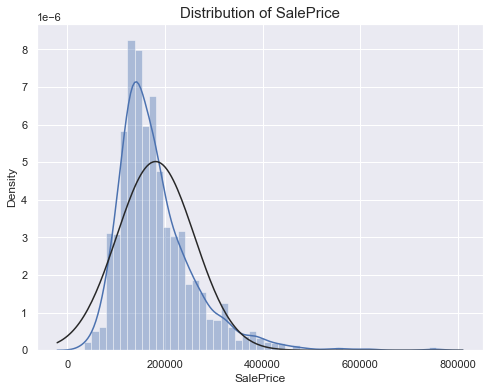

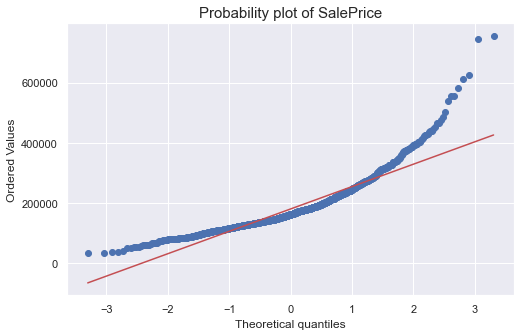

p-value of the Shapiro-Wilk test is 3.425927592277678e-33


In [21]:
#Distribution plot of SalePrice
plt.figure(figsize=(8,6))
sns.distplot(df_train['SalePrice'], fit=norm)
plt.title('Distribution of SalePrice', fontsize=15)
plt.show()

#QQplot of SalePrice
plt.figure(figsize=(8,5))
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.title('Probability plot of SalePrice', fontsize=15)
plt.show()

#Shapiro-Wilk Test
p_value = shapiro(df_train.SalePrice)[1]
print('p-value of the Shapiro-Wilk test is', p_value)

The distribution plot indicates that SalePrice has positive skewness distribution, QQplot shows that the distribution does not follow the diagonal straight line and the p-value of Shapiro-Wilk test below 0.05 so we need to transform target variable SalePrice into more normal distributed. I will transform SalePrice value with log transformation and box-cox transformation and compared the results then choose one of them by the better skewness.

<Figure size 1080x576 with 0 Axes>

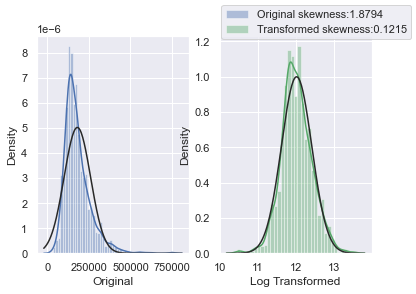

In [22]:
#Using numpy log1p (log(1+x)) function to transform 
log_transform = np.log1p(df_train['SalePrice'])
plt.figure(figsize=(15,8))
fig, ax=plt.subplots(1,2)
sns.distplot(df_train['SalePrice'], fit=norm, color='b', ax=ax[0], axlabel='Original', label='Original skewness:{0}'.format(np.round(skew(df_train['SalePrice']),4)))
sns.distplot(log_transform, fit=norm, color='g', ax=ax[1], axlabel='Log Transformed', label='Transformed skewness:{0}'.format(np.round(skew(log_transform),4)))
fig.legend()
plt.show()

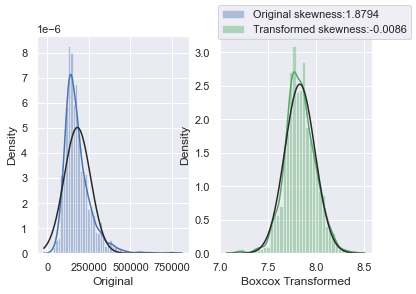

<Figure size 1080x576 with 0 Axes>

In [23]:
#Using scipy stats to boxcox transform 
boxcox_transform, lamb =boxcox(df_train['SalePrice'])
fig, ax=plt.subplots(1,2)
plt.figure(figsize=(15,8))
sns.distplot(df_train['SalePrice'], fit=norm, color='b', ax=ax[0], axlabel='Original', label='Original skewness:{0}'.format(np.round(skew(df_train['SalePrice']),4)))
sns.distplot(boxcox_transform, fit=norm, color='g', ax=ax[1], axlabel='Boxcox Transformed', label='Transformed skewness:{0}'.format(np.round(skew(boxcox_transform),4)))
fig.legend()
plt.show()

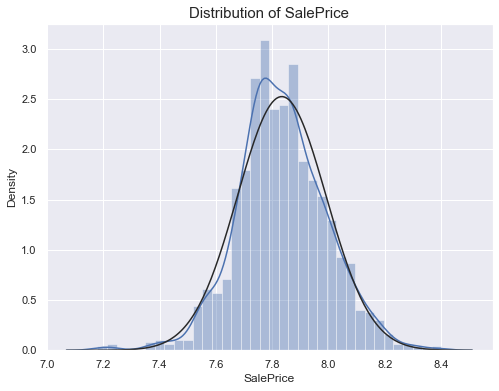

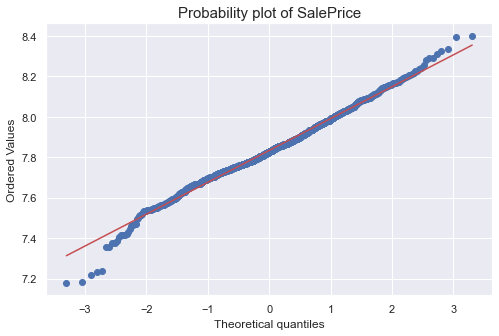

In [24]:
#Transforming SalePrice by boxcox transformation
df_train['SalePrice'], lamb = boxcox(df_train['SalePrice'])

#Distribution plot of SalePrice
plt.figure(figsize=(8,6))
sns.distplot(df_train['SalePrice'], fit=norm)
plt.title('Distribution of SalePrice', fontsize=15)
plt.show()

#QQplot of SalePrice
plt.figure(figsize=(8,5))
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.title('Probability plot of SalePrice', fontsize=15)
plt.show()

In [25]:
lamb

-0.07712954824421477

SalePrice successfully transformed into more normally distributed. 
Note that for submission purpose, SalePrice needs to be transformed back to its real value.

### Checking missing values

In [26]:
#Concat train and test dataset for handling missing values, feature engineering, etc
all_data = pd.concat([df_train,df_test]).reset_index(drop=True)
#Drop target 'SalePrice' from all_data
all_data.drop('SalePrice',axis = 1, inplace=True)
print('all_data shape:{}'.format(all_data.shape))

all_data shape:(2917, 79)


In [27]:
#Check null value
null_df = pd.DataFrame(all_data.isna().sum()*100/all_data.shape[0], columns= ['Missing Percentage'])
null_df = null_df.loc[null_df['Missing Percentage']>0].sort_values(by='Missing Percentage',ascending=False)
null_df

,Missing Percentage
PoolQC,99.69
MiscFeature,96.40
Alley,93.21
Fence,80.43
FireplaceQu,48.68
LotFrontage,16.66
GarageFinish,5.45
GarageQual,5.45
GarageCond,5.45
GarageYrBlt,5.45


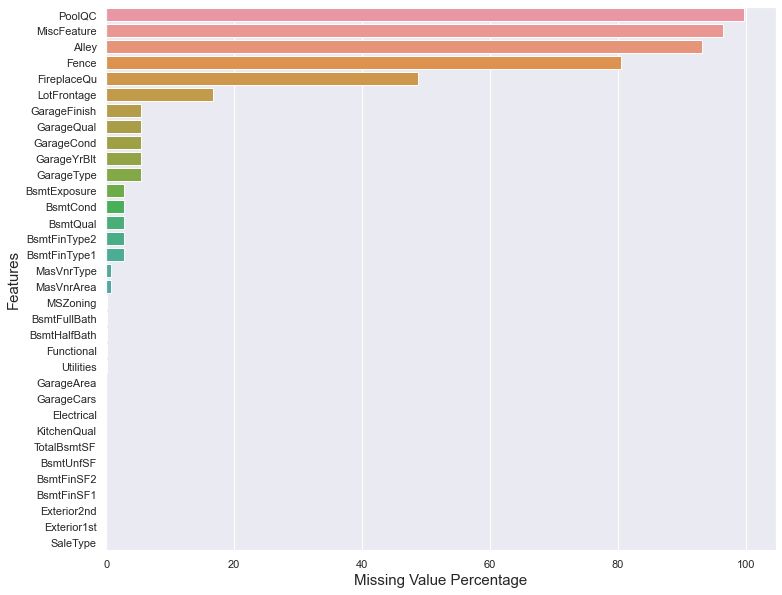

In [28]:
#Missing value percentage visualization
plt.figure(figsize=(12,10))
sns.barplot(x=null_df['Missing Percentage'], y=null_df.index)
plt.xlabel('Missing Value Percentage', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.show()

### Impute Missing Values

**- PoolQC**: from data description NA means the house has no pool so I replace NA with None.
<br>
**- MiscFeature**: from data description NA means the house has no miscellaneous so I replace NA with None.
<br>
**- Alley**: from data description NA means the house has no alley acccess so I replace NA with None.
<br>
**- Fence**: from data description NA means the house has no fence so I replace NA with None.
<br>
**- FireplaceQu**: from data description NA means the house has no fireplace so I replace NA with None.
<br>

In [29]:
for features in ['PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu']:
    all_data[features] = all_data[features].fillna('None')

**- LotFrontage**: Linear feet of street connected to property. A house most likely has lot frontage equal to other houses in the same neighbourhood. So I will replace the NA value with the median value of lot frontage of the same neighbourhood. 

In [30]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood').LotFrontage.transform(lambda x: x.fillna(x.median()))

**- GarageFinish, GarageQual,GarageCond, GarageType**: from data description NA means the house has no garage so I replace NA with None.

In [31]:
for features in ['GarageFinish', 'GarageQual','GarageCond', 'GarageType']:
    all_data[features] = all_data[features].fillna('None')

**- GarageYrBlt, GarageArea, GarageCars**: NA will be replaced by 0 since the houses most likely have no garage.

In [32]:
for features in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    all_data[features] = all_data[features].fillna(0)

**- BsmtExposure, BsmtCond, BsmtQual, BsmtFinType2, BsmtFinType1**: from data description NA means the house has no basement so I replace NA with None.

In [33]:
for features in ['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']:
    all_data[features] = all_data[features].fillna('None')

**- BsmtFullBath, BsmtHalfBath, TotalBsmtSF, BsmtUnfSF, BsmtFinSF2, BsmtFinSF1**: houses that have NA value for these features are most likely have no basement because they have no basement so I replace NA with 0. 

In [34]:
for features in ['BsmtFullBath','BsmtHalfBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']:
    all_data[features] = all_data[features].fillna(0)

**- MasVnrType**:  from data description NA means the house has masonry veneer so I replace NA with None.
<br>
**- MasVnrArea**: NA will be replaced by 0 since the houses have no masonry veneer.

In [35]:
all_data['MasVnrType'].fillna('None', inplace=True)
all_data['MasVnrArea'].fillna(0, inplace=True)

**- MSZoning**: I replace the NA value by the most frequent category 

In [36]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

**- Functional**: Assume typical unless deductions are warranted. NA will be replaced by 'Typ'

In [37]:
all_data['Functional'].fillna('Typ', inplace=True)

**-Utilities**: This feature will be dropped because in train dataset, utilites mostly categorize in 'AllPub' and only 1 'NoSewa' so this feature will have weak predictive power for target.

In [38]:
all_data.drop('Utilities', axis=1, inplace=True)

**- Electrical**: I replace the NA value by the most frequent category 

In [39]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

**- KitchenQual**: I replace the NA value by the most frequent category 

In [40]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

**- Exterior1st , Exterior2nd**: I replace the NA value by the most frequent category 

In [41]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

**- SaleType**: I replace the NA value by the most frequent category 

In [42]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [43]:
#Check null value
null_df = pd.DataFrame(all_data.isna().sum()*100/all_data.shape[0], columns= ['Missing Percentage'])
null_df = null_df.loc[null_df['Missing Percentage']>0].sort_values(by='Missing Percentage',ascending=False)
null_df

,Missing Percentage


All missing values successfully imputed.

### Convert Numerical Features into Categorical (from EDA)

In [44]:
#Converting numerical features that actually are categorical
all_data['MSSubClass']=all_data['MSSubClass'].astype('object')
all_data['MoSold']=all_data['MoSold'].astype('object')
all_data['YrSold']=all_data['YrSold'].astype('object')

### Creating New Input Features

4 techniques that I use to engineer 'informative' features from the existing features:
1. Isolation: Highlight key information from features which helps algorithms 'focus' on what's important
2. Simplification: Simplify the categories of categorical features
3. Combination: Additions of some features to extract a new informative features
4. Interaction: Creating new features by subtractions of features that are strongly correlated 

In [45]:
#Isolation
all_data['HasBasement'] = all_data['BsmtCond'].apply(lambda x:0 if x=='None' else 1) #0:No, 1:Yes
all_data['HasGarage'] = all_data['GarageQual'].apply(lambda x:0 if x=='None' else 1) #0:No, 1:Yes
all_data['Has2ndFlr'] = all_data['2ndFlrSF'].apply(lambda x:0 if x==0 else 1) #0:No, 1:Yes
all_data['HasFireplaces'] = all_data['Fireplaces'].apply(lambda x:0 if x==0 else 1) #0:No, 1:Yes
##Unifinished basement (because prospective buyers will consider condition of the house basement)
all_data['UnfBsmt1'] = (all_data['BsmtFinType1']=='Unf')*1
##Has been remodelled or not (same as construction year if no remodeling or additions)
all_data['HasRemodAdd'] = (abs(all_data['YearRemodAdd'] - all_data['YearBuilt'])).apply(lambda x:0 if x==0 else 1) #0:No, 1:Yes

#Simplification
##1:Poor, 2:Fair, 3:Typical, 4:Good, 5:Excellent
x={1:1, 2:1, 3:2,4:2, 5:3, 6:3, 7:4, 8:4, 9:5, 10:5}
all_data['OverallCond'] = all_data['OverallCond'].map(x)
all_data['OverallQual'] = all_data['OverallQual'].map(x)

#Combination
all_data['TotalSF']= all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['TotalBath'] = all_data['BsmtFullBath'] + all_data['BsmtHalfBath'] + all_data['FullBath'] + all_data['HalfBath']
all_data['AverageScore'] = (all_data['OverallCond']  + all_data['OverallQual'])/2
all_data['TotalPorchSF'] = (all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch'] +
                              all_data['3SsnPorch']+ all_data['ScreenPorch'])

#Interaction 
##If garage was built the same year the house was built
all_data['GarageSameYr'] = (abs(all_data['GarageYrBlt']-all_data['YearBuilt'])).apply(lambda x:1 if x==0 else 0) #0:No, 1:Yes
##If the 1stFlr area Square feet equal to total basement area square feet
all_data['1stFlrBsmtEql'] = (abs(all_data['1stFlrSF']-all_data['TotalBsmtSF'])).apply(lambda x:1 if x==0 else 0) #0:No, 1:Yes

### Label Encoding

Some of the categorical variables have sequential categories / orders. This insightful [discussion](https://stats.stackexchange.com/questions/423820/do-ordinal-variables-require-one-hot-encoding) give me an idea how to treat them. I quote:
<br>
"The proper treatment of ordinal independent data in regression is tricky.
The two most common approaches are:
<br>
1.Treat it as continuous (but this ignores the fact that the differences in levels may not be similar).
<br>
2.Treat it as categorical (but this ignores the ordered nature of the variable).

The first method would not require one-hot encoding. The second would. Some new methods have been developed. One that I have sometimes found useful is optimal scaling."

I think the best option for this case is to encode them sequentially for ordinal independent variables that have inherent order.

In [46]:
all_data = all_data.replace({'Street':{'Grvl':1, 'Pave':2},
                           'Alley':{'Grvl':1, 'Pave':2},
                           'LotShape':{'IR3':1,'IR2':2,'IR1':3,'Reg':4},
                           'LandSlope':{'Sev':1, 'Mod':2,'Gtl':3},
                           'ExterQual':{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                           'ExterCond':{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                           'BsmtQual':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                           'BsmtCond':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                           'BsmtExposure':{'None':0,'No':0,'Mn':1,'Av':2,'Gd':3},
                           'BsmtFinType1':{'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
                           'BsmtFinType2':{'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
                           'HeatingQC':{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                           'CentralAir':{'N':0,'Y':1},
                           'KitchenQual':{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                           'FireplaceQu':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                           'GarageFinish':{'None':0,'Unf':1,'RFn':2,'Fin':3},
                           'GarageQual':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                           'GarageCond':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                           'PavedDrive':{'N':1,'P':2,'Y':3},
                           'PoolQC':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}})

### Skewed Features

Same as target variable, numerical independent variables/features that have skewness in their distribution must be transformed to reduce the impact of outliers:
1. Seems like boxcox method does slightly better transformation than log transformation.
2. Distribution with 0 skewness is a perfect normal distribution. I will use 0.75 as the threshold for skewed distribution.

In [47]:
#defining numerical features
num_cols = all_data.dtypes[all_data.dtypes!='object'].index
#skewed distribution
skew_dist = all_data[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_dist = skew_dist[abs(skew_dist)>0.75]
#skewed features
skew_feat = skew_dist.index
print('There are {} features with >0.75 skewness'.format(skew_dist.shape[0]))
skew_dist.head(10)

There are 40 features with >0.75 skewness


MiscVal         21.94
PoolQC          19.55
PoolArea        17.69
LotArea         13.11
LowQualFinSF    12.08
3SsnPorch       11.37
KitchenAbvGr     4.30
BsmtFinSF2       4.14
EnclosedPorch    4.00
ScreenPorch      3.95
dtype: float64

In [48]:
#Using boxcox1p (Compute the Box-Cox transformation of 1 + x)  because to boxcox transform, values strictly to be positive
for feat in skew_feat:
    #boxcox_normmax to find optimal lambda
    all_data[feat] = boxcox1p(all_data[feat], boxcox_normmax(all_data[feat] + 1))

### Dummy Features

In [49]:
#Drop redundant variables with drop_first parameter
all_data = pd.get_dummies(all_data, drop_first = True)
print(all_data.shape)

(2917, 247)


In [50]:
all_data.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,HasBasement,HasGarage,Has2ndFlr,HasFireplaces,UnfBsmt1,HasRemodAdd,TotalSF,TotalBath,AverageScore,TotalPorchSF,GarageSameYr,1stFlrBsmtEql,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_2,Alley_None,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,18.14,13.83,1.93,12.16,42.42,4,3,2003,2003,19.43,1.60,2.13,12.86,17.32,0.00,6,144.12,0.60,0.00,29.99,856.00,5,200.67,5.94,1025.65,0.00,8.35,1.00,0.00,2,1,3,0.75,4,8,0,0,83230810777839394106209856602790225958906717318...,2,2.00,548.00,18.30,17.15,97.39,0.00,12.08,0.00,0.00,0.00,

## Model Training

In [51]:
#Libraries for modelling
from sklearn.preprocessing import  RobustScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from xgboost import XGBRegressor

### New train & test data after processing

In [52]:
X_train = all_data[:df_train.shape[0]]
X_test = all_data[df_train.shape[0]:]
y = df_train['SalePrice']
X_train.shape, y.shape, X_test.shape

((1458, 247), (1458,), (1459, 247))

### Cross Validation and Model Evaluation Setup

In [53]:
#KFold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=123)

<img src='Cross-validation-k-fold.jpg' width='400' height='200'>

In [54]:
#RMSE as evaluation metrics
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=kf))
    return(rmse)

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
### $$ \operatorname{RMSE}= \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2} $$

Where
* $y_i$ = Observed data of point i
* $\hat{y_i}$ = Predicted data of point i . 

### Regression Model with L1 Regularization (Lasso)

“LASSO” stands for Least Absolute Shrinkage and Selection Operator.  Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients. Some coefficients can become zero and eliminated from the model. I use EstimatorCV such as LassoCV, RidgeCV, and ElasticNetCV to find the optimal alpha(attributes) of the model. For lasso regression, usually model complexity decreases with increase in the values of alpha because the regularization creates high sparsity model with many predictors eliminated (0 value of coefficient)

In [55]:
lasso_alpha = [1e-5, 3e-5, 5e-5 ,1e-4, 3e-4, 5e-4, 1e-3,1e-2,1e-1, 1]
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=lasso_alpha, random_state=42, cv=kf)).fit(X_train, y)
print('Best alpha:', lasso.named_steps['lassocv'].alpha_)

Best alpha: 0.0001


In [56]:
score = {}
lasso_score = cv_rmse(lasso)
print("Lasso Score: {:.4f} ({:.4f})".format(lasso_score.mean(), lasso_score.std()))
score['Lasso'] = [lasso_score.mean(),lasso_score.std()]

Lasso Score: 0.0462 (0.0037)


In [57]:
coef = pd.Series(lasso.named_steps['lassocv'].coef_, index = X_train.columns)

In [58]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 145 variables and eliminated the other 102 variables


There are 102 variables (41% of total) eliminated because of the regularization, resulting in sparse models with few coefficients!

In [59]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

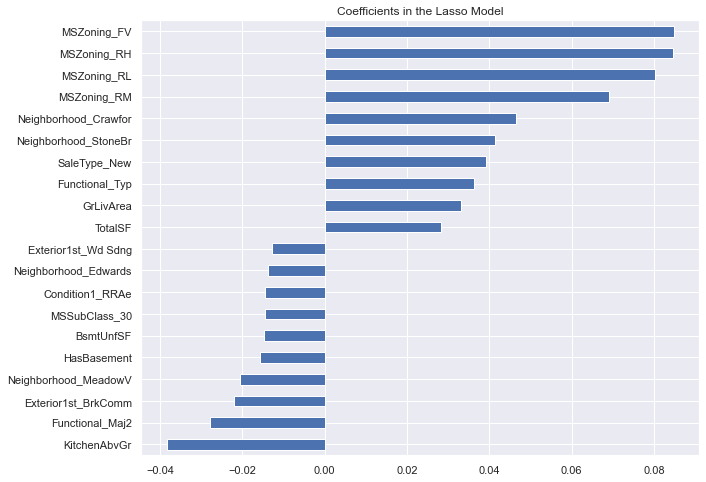

In [60]:
plt.figure(figsize=(10,8))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

Some interpretations of lasso model from plot above:
<br>
1. Four of the MSZoning categories are the most important variables to predict the house price with zoning classification 'Floating Village Residential' (FV) has the biggest weight.
2. Neighbourhood categories also have big weight both in positive and negative ways. It means house prices change differently depends on the neigbourhood.
3. GrLivArea is also in the list of big weight variables. It has been predicted from the correlation matrix that GrLivArea and SalePrice are highly correlated!
4. TotalSF and HasBasement which was created from feature engineering becomes one of the important variables too. It proves that  a new 'informative' feature from existing feature can be powerful to predict the target.

### Regression Model with L2 Regularization (Ridge)

L2 regularization adds an L2 penalty, which equals the square of the magnitude of coefficients. All coefficients are shrunk by the same factor (so none are eliminated). Unlike L1 regularization, L2 will not result in sparse models.

A tuning parameter (λ) controls the strength of the penalty term. When λ = 0, ridge regression equals least squares regression. If λ = ∞, all coefficients are shrunk to zero. The ideal penalty is therefore somewhere in between 0 and ∞.

In [61]:
ridge_alpha = [1e-5,1e-4, 1e-3,1e-2,1e-1, 1, 5, 8, 10, 12, 15,18, 25 , 50, 75]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alpha, cv=kf)).fit(X_train, y)
print('Best alpha:', ridge.named_steps['ridgecv'].alpha_)

Best alpha: 12.0


In [62]:
ridge_score = cv_rmse(ridge)
print("Ridge Score: {:.4f} ({:.4f})".format(ridge_score.mean(), ridge_score.std()))
score['Ridge'] = [ridge_score.mean(),ridge_score.std()]

Ridge Score: 0.0458 (0.0042)


Ridge picked 246 features and eliminated the other 1 features


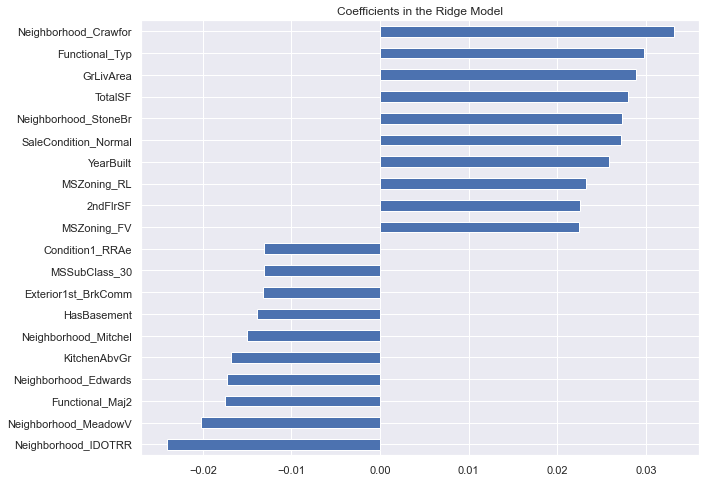

In [63]:
# Plot important coefficients
coefs = pd.Series(ridge.named_steps['ridgecv'].coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
plt.figure(figsize=(10,8))
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

RMSE of ridge model is slightly better from the lasso one. The main diffence of L2 regularization from L1 is  does not perform feature elimination. All features will be used to predict the SalePrice. Note that variable coefficient of ridge model are smaller than lasso. Some interpretions of this model from plot above:
1. Model puts big weight on Neighbourhood categories in both positive and negative ways.
2. GrLivArea is also in the list of big weight variables.
3. TotalSF and HasBasement becomes one of the important variables too. 
4. YearBuilt and 2ndFloorSF are important features. From the EDA visualization houses that was built in recent years or houses with larger 2nd floor area tends to be more expensive.

### ElasticNet

- Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions. Elastic net is a penalized linear regression model that includes both the L1 and L2 penalties during training. 

- Hyperparameter “L1_ratio” is provided to assign how much weight is given to each of the L1 and L2 penalties. The ratio is a value between 0 and 1 and is used to weight the contribution of the L1 penalty and one minus the ratio value is used to weight the L2 penalty. For example, an L1_ratio of 0.5 would provide a 50 percent contribution of each penalty to the loss function. An L1_ratio value of 0 gives all weight to the L2 penalty and a value of 1 gives all weight to the L1 penalty.

- Note that a good choice of list of values for l1_ratio is often to put more values close to 1 (i.e. Lasso) and less close to 0 (i.e. Ridge), as in [.1, .5, .7, .9, .95, .99, 1].

- Another hyperparameter is provided called “lambda” or "alpha" that controls the weighting of the sum of both penalties to the loss function. A default value of 1.0 is used to use the fully weighted penalty; a value of 0 excludes the penalty. Very small values of lambda, such as 1e-3 or smaller, are common.



In [64]:
l1_ratio = [1e-3, 1e-2, 1e-1, 5e-1, 7e-1, 9e-1, 9.5e-1, 9.9e-1, 1]
enet_alpha = [1e-5, 3e-5, 5e-5 ,1e-4, 3e-4, 5e-4, 1e-3,1e-2,1e-1, 1, 5, 10, 12, 15, 25]
enet = make_pipeline(RobustScaler(), ElasticNetCV(l1_ratio=l1_ratio, alphas=enet_alpha, cv=kf)).fit(X_train, y)
print('Best l1_ratio:', enet.named_steps['elasticnetcv'].l1_ratio_)
print('Best alpha:', enet.named_steps['elasticnetcv'].alpha_)

Best l1_ratio: 0.7
Best alpha: 0.0001


In [65]:
enet_score = cv_rmse(enet)
print("ElasticNet Score: {:.4f} ({:.4f})".format(enet_score.mean(), enet_score.std()))
score['ElasticNet'] = [enet_score.mean(),enet_score.std()]

ElasticNet Score: 0.0462 (0.0036)


Elastic Net picked 166 features and eliminated the other 81 features


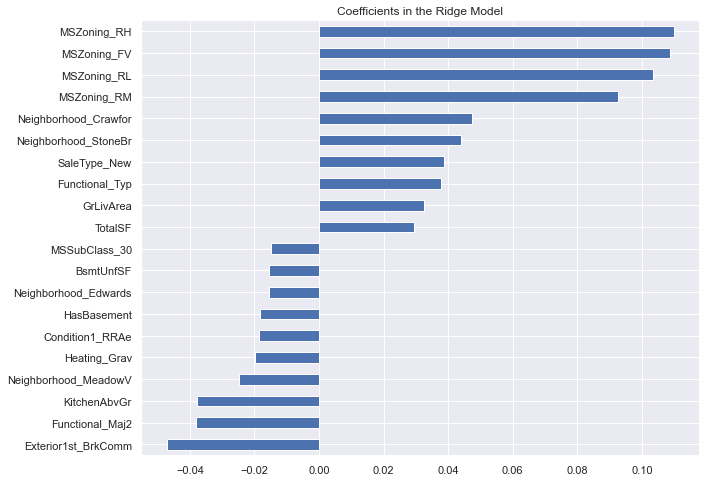

In [66]:
# Plot important coefficients
coefs = pd.Series(enet.named_steps['elasticnetcv'].coef_, index = X_train.columns)
print("Elastic Net picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
plt.figure(figsize=(10,8))
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

Because the best L1_ratio is close to 1, the model is pretty similar to Lasso model although features that was dropped with elasticnet are fewer than the lasso model. From 3 regularization estimator, ridge model has the best RMSE score and it will be used for submission.

In [67]:
score

{'Lasso': [0.046227623487140636, 0.003710253146750113],
 'Ridge': [0.04577897024270457, 0.004178995151854708],
 'ElasticNet': [0.046192771954616796, 0.003576256615892372]}

In [68]:
for i in score.items():
    print(i[1][1])

0.003710253146750113
0.004178995151854708
0.003576256615892372


In [69]:
pd.set_option('display.float_format','{:.5f}' .format)
score_df=pd.DataFrame(index=[i[0] for i in score.items()])
score_df['RMSE Mean'] = [i[1][0] for i in score.items()]
score_df['RMSE Std'] = [i[1][1] for i in score.items()]
score_df.round(decimals=5)

,RMSE Mean,RMSE Std
Lasso,0.04623,0.00371
Ridge,0.04578,0.00418
ElasticNet,0.04619,0.00358


### Submission Data

In [70]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [71]:
#Ridge model prediction
ridge_train_pred = ridge.predict(X_train)
ridge_pred = ridge.predict(X_test)
print(rmse(y, ridge_train_pred))

0.03997548156675718


In [72]:
#Transform inverse the SalePrice
SalePrice = inv_boxcox(ridge_pred, lamb)
SalePrice

array([117805.58294036, 151226.20749254, 190993.71188866, ...,
       175377.01461626, 123635.09318886, 220404.12989339])

In [73]:
submission = pd.DataFrame()
submission['Id'] = test_id
submission['SalePrice'] = SalePrice
submission.to_csv('submission.csv',index=False)

In [74]:
submission.head(10)

,Id,SalePrice
0,1461,117805.58294
1,1462,151226.20749
2,1463,190993.71189
3,1464,188809.09441
4,1465,192784.04116
5,1466,167664.15570
6,1467,174287.17596
7,1468,161241.46906
8,1469,194994.04543
9,1470,119731.98238


I will continue this notebook in the future for model improvement with other machine learning algorithm like XGBoost or using stacking method (combination of two or three models) for better RMSE score.

### XGBoost

In [75]:
'''# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)'''

"# XGBoost Regressor\nxgboost = XGBRegressor(learning_rate=0.01,\n                       n_estimators=6000,\n                       max_depth=4,\n                       min_child_weight=0,\n                       gamma=0.6,\n                       subsample=0.7,\n                       colsample_bytree=0.7,\n                       objective='reg:linear',\n                       nthread=-1,\n                       scale_pos_weight=1,\n                       seed=27,\n                       reg_alpha=0.00006,\n                       random_state=42)"

In [76]:
'''xgb_score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})".format(xgb_score.mean(), xgb_score.std()))
score['Ridge'] = (xgb_score.mean(),xgb_score.std())'''

'xgb_score = cv_rmse(xgboost)\nprint("Xgboost score: {:.4f} ({:.4f})".format(xgb_score.mean(), xgb_score.std()))\nscore[\'Ridge\'] = (xgb_score.mean(),xgb_score.std())'